In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import shap

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
def Drop_same_data(dataframe):
    x0_same = dataframe[dataframe.duplicated(subset=['x0'], keep=False)]
    x0_same_group = x0_same.groupby('x0').aggregate('mean')
    x0_same_group = x0_same_group.reset_index()
    x0_same_drop = dataframe.drop_duplicates(['x0'], keep=False)
    x0_same_drop_mean = x0_same_drop.append(x0_same_group)
    x0_same_drop_mean = x0_same_drop_mean.sort_values('x0').reset_index(drop=True)
    return x0_same_drop_mean

In [4]:
def change_state(dataframe):
    df = dataframe.copy()
    df.replace('normal', 0, inplace=True)
    df.replace('abnormal', 1, inplace=True)
    return df

In [5]:
motor1 = pd.read_csv("C:/Users/creade/data_science/현대중공업_DT/DT/renewal_code/data/motor1.csv")
motor1.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26
0,2019-05-01 02:05:54,-0.583180,0.544801,-1.839546,-1.611705,0.727061,-2.136444,-3.179617,0.011333,1.161184,...,-0.525366,-0.696114,-0.012986,1.192422,-0.652867,3.0,-9.616957,0.137369,-1.582205,abnormal
1,2019-05-01 02:05:55,-0.581843,0.544552,-1.829168,-1.611705,0.729050,-2.123520,-3.170427,0.011333,1.168481,...,-0.524120,-0.695196,-0.012731,1.175877,-0.651512,3.0,-9.601653,0.137344,-1.582205,abnormal
2,2019-05-01 02:05:56,-0.580507,0.544302,-1.818789,-1.611705,0.731038,-2.110595,-3.161236,0.011333,1.175778,...,-0.522874,-0.694278,-0.012604,1.175877,-0.650201,3.0,-9.586350,0.137319,-1.582205,abnormal
3,2019-05-01 02:05:57,-0.579210,0.544095,-1.810141,-1.611705,0.733027,-2.097670,-3.152046,0.011333,1.183076,...,-0.521628,-0.693359,-0.012477,1.159333,-0.648977,3.0,-9.570920,0.137306,-1.582205,abnormal
4,2019-05-01 02:05:58,-0.577914,0.543887,-1.801492,-1.611705,0.735015,-2.084745,-3.142855,0.011333,1.190373,...,-0.520383,-0.692135,-0.012350,1.142788,-0.647754,3.0,-9.555490,0.137306,-1.582205,abnormal


## 전처리

In [6]:
motor1 = change_state(motor1)
motor1 = Drop_same_data(motor1)
motor1 = motor1.round(2)

before True
after False


In [7]:
motor1.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26
0,2019-05-01 02:05:54,-0.58,0.54,-1.84,-1.61,0.73,-2.14,-3.18,0.01,1.16,...,-0.53,-0.70,-0.01,1.19,-0.65,3.0,-9.62,0.14,-1.58,1.0
1,2019-05-01 02:05:55,-0.58,0.54,-1.83,-1.61,0.73,-2.12,-3.17,0.01,1.17,...,-0.52,-0.70,-0.01,1.18,-0.65,3.0,-9.60,0.14,-1.58,1.0
2,2019-05-01 02:05:56,-0.58,0.54,-1.82,-1.61,0.73,-2.11,-3.16,0.01,1.18,...,-0.52,-0.69,-0.01,1.18,-0.65,3.0,-9.59,0.14,-1.58,1.0
3,2019-05-01 02:05:57,-0.58,0.54,-1.81,-1.61,0.73,-2.10,-3.15,0.01,1.18,...,-0.52,-0.69,-0.01,1.16,-0.65,3.0,-9.57,0.14,-1.58,1.0
4,2019-05-01 02:05:58,-0.58,0.54,-1.80,-1.61,0.74,-2.08,-3.14,0.01,1.19,...,-0.52,-0.69,-0.01,1.14,-0.65,3.0,-9.56,0.14,-1.58,1.0


## PCA

- System 2 : x12, x13, x23
- System 3 : x12, x13
- System 4 : x9, x10

### System 2

In [8]:
System2_col = ['x12', 'x13', 'x23']
System2_pca_df = motor1[System2_col]

System2_pca = PCA(n_components=1)
System2_pca.fit(System2_pca_df)
System2_pca_result = System2_pca.transform(System2_pca_df)

# 차원 축소 결과
print('차원 축소 결과 평가', System2_pca.explained_variance_ratio_)

# DataFrame으로 변환
System2_pca_result_df = pd.DataFrame(System2_pca_result, columns=['System2 PCA'])
System2_pca_result_df

차원 축소 결과 평가 [0.9345851]


,System2 PCA
0,6.601154
1,6.589466
2,6.589273
3,6.577585
4,6.565917
...,...
4243626,4.519429
4243627,4.519429
4243628,4.519429
4243629,4.519429


### System 3

In [9]:
System3_col = ['x12', 'x13']
System3_pca_df = motor1[System3_col]
System3_pca_df

System3_pca = PCA(n_components=1)
System3_pca.fit(System3_pca_df)
System3_pca_result = System3_pca.transform(System3_pca_df)

# 차원 축소 결과
print('차원 축소 결과 평가', System3_pca.explained_variance_ratio_)

# DataFrame으로 변환
System3_pca_result_df = pd.DataFrame(System3_pca_result, columns=['System3 PCA'])
System3_pca_result_df

차원 축소 결과 평가 [0.93435696]


,System3 PCA
0,1.209058
1,1.209058
2,1.216129
3,1.216129
4,1.209058
...,...
4243626,3.401092
4243627,3.401092
4243628,3.401092
4243629,3.401092


### System 4

In [10]:
System4_col = ['x9', 'x10']
System4_pca_df = motor1[System4_col]
System4_pca_df

System4_pca = PCA(n_components=1)
System4_pca.fit(System4_pca_df)
System4_pca_result = System4_pca.transform(System4_pca_df)

# 차원 축소 결과
print('차원 축소 결과 평가', System4_pca.explained_variance_ratio_)

# DataFrame으로 변환
System4_pca_result_df = pd.DataFrame(System4_pca_result, columns=['System4 PCA'])
System4_pca_result_df

차원 축소 결과 평가 [0.94432419]


,System4 PCA
0,1.499195
1,1.513337
2,1.527479
3,1.534550
4,1.541621
...,...
4243626,-1.541294
4243627,-1.541294
4243628,-1.548365
4243629,-1.548365


## 최종 데이터 정리

In [11]:
df = motor1[['x3', 'x4', 'x5', 'x14', 'x15']]
df['System2 PCA'] = System2_pca_result_df['System2 PCA']
df['System3 PCA'] = System3_pca_result_df['System3 PCA']
df['System4 PCA'] = System4_pca_result_df['System4 PCA']
df['x26'] = motor1['x26']
df

,x3,x4,x5,x14,x15,System2 PCA,System3 PCA,System4 PCA,x26
0,-1.84,-1.61,0.73,-1.21,-1.09,6.601154,1.209058,1.499195,1.0
1,-1.83,-1.61,0.73,-1.20,-1.08,6.589466,1.209058,1.513337,1.0
2,-1.82,-1.61,0.73,-1.20,-1.08,6.589273,1.216129,1.527479,1.0
3,-1.81,-1.61,0.73,-1.20,-1.08,6.577585,1.216129,1.534550,1.0
4,-1.80,-1.61,0.74,-1.19,-1.08,6.565917,1.209058,1.541621,1.0
...,...,...,...,...,...,...,...,...,...
4243626,1.29,-1.25,-1.18,-1.34,3.04,4.519429,3.401092,-1.541294,0.0
4243627,1.29,-1.25,-1.18,-1.34,3.04,4.519429,3.401092,-1.541294,0.0
4243628,1.29,-1.25,-1.18,-1.34,3.04,4.519429,3.401092,-1.548365,0.0
4243629,1.29,-1.25,-1.18,-1.34,3.04,4.519429,3.401092,-1.548365,0.0


In [12]:
# 정상 되는 시점의 index 값
first_normal_idx = np.argmax(df['x26'] == 0)
first_normal_idx

2804007

In [13]:
# 각 시스템에 해당하는 변수 정리
System1_col = ['x4', 'x5', 'x14', 'x15', 'x26']
System2_col = ['System2 PCA', 'x26']
System3_col = ['x3', 'System3 PCA', 'x26']
System4_col = ['x3', 'System4 PCA', 'x26']

System1_df = df[System1_col]
System2_df = df[System2_col]
System3_df = df[System3_col]
System4_df = df[System4_col]

## Problem 1

### System 1

In [14]:
# Train dataset - 양 끝의 정상, 비정상
System1_train_abnormal = System1_df[:2243205]
System1_train_normal = System1_df[3091932:]
System1_train = pd.concat([System1_train_abnormal, System1_train_normal]).reset_index(drop=True) # 하나로 묶음
System1_train.head()

,x4,x5,x14,x15,x26
0,-1.61,0.73,-1.21,-1.09,1.0
1,-1.61,0.73,-1.20,-1.08,1.0
2,-1.61,0.73,-1.20,-1.08,1.0
3,-1.61,0.73,-1.20,-1.08,1.0
4,-1.61,0.74,-1.19,-1.08,1.0


In [15]:
# 셔플 안 하고 X, y 분리 - Train
System1_train_x = System1_train.drop('x26', axis=1)
System1_train_y = System1_train['x26']

print(System1_train_x.shape, System1_train_y.shape)

(3394904, 4) (3394904,)


In [16]:
# test dataset - 중앙 쪽 (train 제외 나머지)
System1_test = System1_df[2243205:3091932].reset_index(drop=True)
System1_test.head()

,x4,x5,x14,x15,x26
0,0.21,-0.05,0.1,-0.55,1.0
1,0.21,-0.05,0.1,-0.55,1.0
2,0.21,-0.05,0.1,-0.55,1.0
3,0.21,-0.05,0.1,-0.55,1.0
4,0.21,-0.05,0.1,-0.55,1.0


In [17]:
# X, y 분리 - Test
System1_test_x = System1_test.drop('x26', axis=1)
System1_test_y = System1_test['x26']

print(System1_test_x.shape, System1_test_y.shape)

(848727, 4) (848727,)


In [18]:
# 모델 선언 및 훈련
System1_model = LogisticRegression(solver="lbfgs", C=10, tol=1e-4, max_iter=1000)                  
System1_model.fit(System1_train_x, System1_train_y)

LogisticRegression(C=10, max_iter=1000)

In [19]:
# 예측값
System1_pred = System1_model.predict(System1_test_x)

# 다른 평가지표
accuracy = System1_model.score(System1_test_x, System1_test_y)
precision = precision_score(System1_test_y, System1_pred)
recall = recall_score(System1_test_y, System1_pred)
f1 = f1_score(System1_test_y, System1_pred)
print("Accuracy(정확도):", accuracy.round(2))
print('Presicion(정밀도): ', precision.round(2))
print('Recall(재현율): ', recall.round(2))
print('F1_score: ', f1.round(2))

Accuracy(정확도): 0.85
Presicion(정밀도):  0.87
Recall(재현율):  0.91
F1_score:  0.89


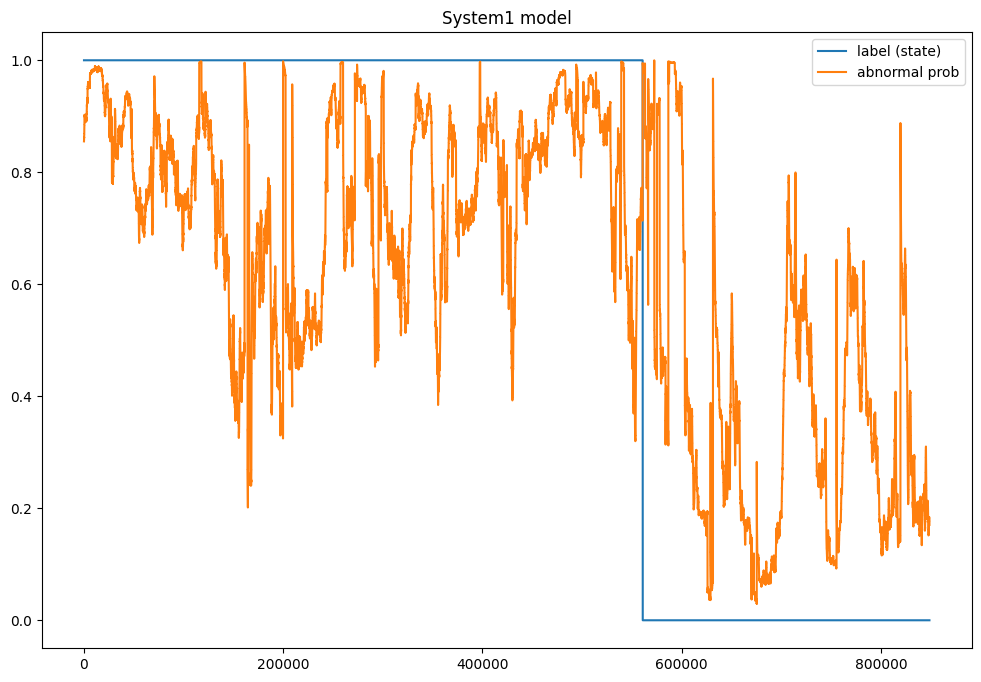

In [20]:
# 확률
System1_prob = System1_model.predict_proba(System1_test_x)

# 시각화
plt.figure(figsize=(12, 8))
plt.plot(System1_test_y, label='label (state)')
plt.plot(System1_prob[:,1], label='abnormal prob')
plt.legend()
plt.title('System1 model')
plt.show()

### System 2

In [21]:
# Train dataset - 양 끝의 정상, 비정상
System2_train_abnormal = System2_df[:2243205]
System2_train_normal = System2_df[3091932:]
System2_train = pd.concat([System2_train_abnormal, System2_train_normal]).reset_index(drop=True) # 하나로 묶음
System2_train.head()

,System2 PCA,x26
0,6.601154,1.0
1,6.589466,1.0
2,6.589273,1.0
3,6.577585,1.0
4,6.565917,1.0


In [22]:
# 셔플 안 하고 X, y 분리 - Train
System2_train_x = System2_train.drop('x26', axis=1)
System2_train_y = System2_train['x26']

print(System2_train_x.shape, System2_train_y.shape)

(3394904, 1) (3394904,)


In [23]:
# test dataset - 중앙 쪽 (train 제외 나머지)
System2_test = System2_df[2243205:3091932].reset_index(drop=True)
System2_test.head()

,System2 PCA,x26
0,-0.225522,1.0
1,-0.225522,1.0
2,-0.225522,1.0
3,-0.225522,1.0
4,-0.225522,1.0


In [24]:
# X, y 분리 - Test
System2_test_x = System2_test.drop('x26', axis=1)
System2_test_y = System2_test['x26']

print(System2_test_x.shape, System2_test_y.shape)

(848727, 1) (848727,)


In [25]:
# 모델 선언 및 훈련
System2_model = LogisticRegression(solver="lbfgs", C=10, tol=1e-4, max_iter=1000)                  
System2_model.fit(System2_train_x, System2_train_y)

LogisticRegression(C=10, max_iter=1000)

In [26]:
# 예측값
System2_pred = System2_model.predict(System2_test_x)

# 다른 평가지표
accuracy = System2_model.score(System2_test_x, System2_test_y)
precision = precision_score(System2_test_y, System2_pred)
recall = recall_score(System2_test_y, System2_pred)
f1 = f1_score(System2_test_y, System2_pred)
print("Accuracy(정확도):", accuracy.round(2))
print('Presicion(정밀도): ', precision.round(2))
print('Recall(재현율): ', recall.round(2))
print('F1_score: ', f1.round(2))

Accuracy(정확도): 0.95
Presicion(정밀도):  0.95
Recall(재현율):  0.97
F1_score:  0.96


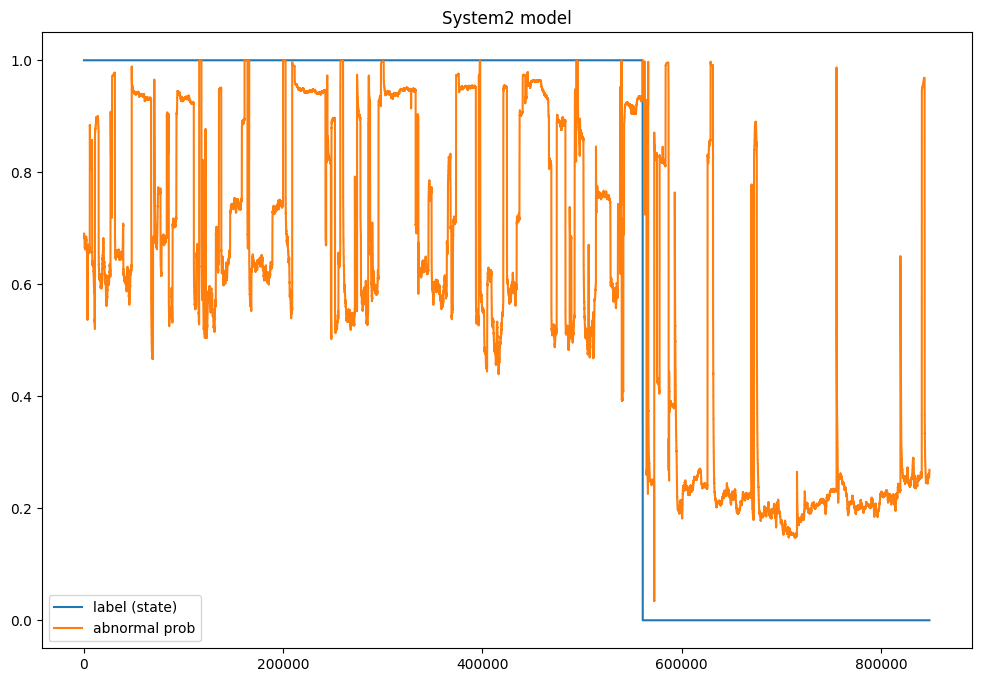

In [27]:
# 확률
System2_prob = System2_model.predict_proba(System2_test_x)

# 시각화
plt.figure(figsize=(12, 8))
plt.plot(System2_test_y, label='label (state)')
plt.plot(System2_prob[:,1], label='abnormal prob')
plt.legend()
plt.title('System2 model')
plt.show()

### System 3

In [28]:
# Train dataset - 양 끝의 정상, 비정상
System3_train_abnormal = System3_df[:2243205]
System3_train_normal = System3_df[3091932:]
System3_train = pd.concat([System3_train_abnormal, System3_train_normal]).reset_index(drop=True) # 하나로 묶음
System3_train.head()

,x3,System3 PCA,x26
0,-1.84,1.209058,1.0
1,-1.83,1.209058,1.0
2,-1.82,1.216129,1.0
3,-1.81,1.216129,1.0
4,-1.80,1.209058,1.0


In [29]:
# 셔플 안 하고 X, y 분리 - Train
System3_train_x = System3_train.drop('x26', axis=1)
System3_train_y = System3_train['x26']

print(System3_train_x.shape, System3_train_y.shape)

(3394904, 2) (3394904,)


In [30]:
# test dataset - 중앙 쪽 (train 제외 나머지)
System3_test = System3_df[2243205:3091932].reset_index(drop=True)
System3_test.head()

,x3,System3 PCA,x26
0,-0.83,-0.162729,1.0
1,-0.83,-0.162729,1.0
2,-0.83,-0.162729,1.0
3,-0.82,-0.162729,1.0
4,-0.82,-0.162729,1.0


In [31]:
# X, y 분리 - Test
System3_test_x = System3_test.drop('x26', axis=1)
System3_test_y = System3_test['x26']

print(System3_test_x.shape, System3_test_y.shape)

(848727, 2) (848727,)


In [32]:
# 모델 선언 및 훈련
System3_model = LogisticRegression(solver="lbfgs", C=10, tol=1e-4, max_iter=1000)                  
System3_model.fit(System3_train_x, System3_train_y)

LogisticRegression(C=10, max_iter=1000)

In [33]:
# 예측값
System3_pred = System3_model.predict(System3_test_x)

# 다른 평가지표
accuracy = System3_model.score(System3_test_x, System3_test_y)
precision = precision_score(System3_test_y, System3_pred)
recall = recall_score(System3_test_y, System3_pred)
f1 = f1_score(System3_test_y, System3_pred)
print("Accuracy(정확도):", accuracy.round(2))
print('Presicion(정밀도): ', precision.round(2))
print('Recall(재현율): ', recall.round(2))
print('F1_score: ', f1.round(2))

Accuracy(정확도): 0.96
Presicion(정밀도):  0.94
Recall(재현율):  1.0
F1_score:  0.97


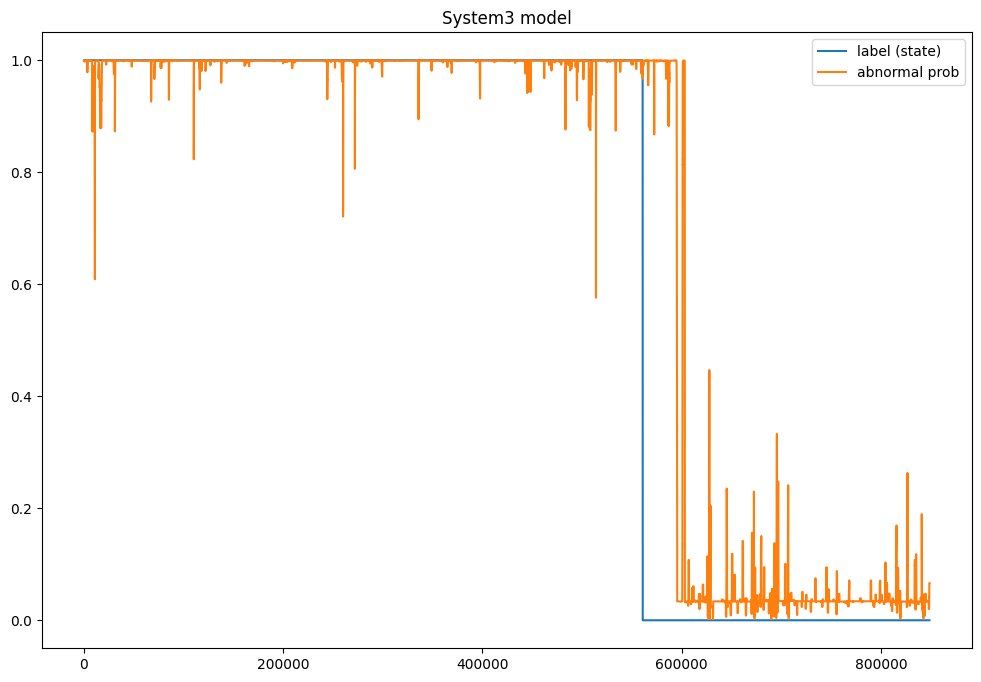

In [34]:
# 확률
System3_prob = System3_model.predict_proba(System3_test_x)

# 시각화
plt.figure(figsize=(12, 8))
plt.plot(System3_test_y, label='label (state)')
plt.plot(System3_prob[:,1], label='abnormal prob')
plt.legend()
plt.title('System3 model')
plt.show()

### System 4

In [35]:
# Train dataset - 양 끝의 정상, 비정상
System4_train_abnormal = System4_df[:2243205]
System4_train_normal = System4_df[3091932:]
System4_train = pd.concat([System4_train_abnormal, System4_train_normal]).reset_index(drop=True) # 하나로 묶음
System4_train.head()

,x3,System4 PCA,x26
0,-1.84,1.499195,1.0
1,-1.83,1.513337,1.0
2,-1.82,1.527479,1.0
3,-1.81,1.534550,1.0
4,-1.80,1.541621,1.0


In [36]:
# 셔플 안 하고 X, y 분리 - Train
System4_train_x = System4_train.drop('x26', axis=1)
System4_train_y = System4_train['x26']

print(System4_train_x.shape, System4_train_y.shape)

(3394904, 2) (3394904,)


In [37]:
# test dataset - 중앙 쪽 (train 제외 나머지)
System4_test = System4_df[2243205:3091932].reset_index(drop=True)
System4_test.head()

,x3,System4 PCA,x26
0,-0.83,-1.223194,1.0
1,-0.83,-1.216122,1.0
2,-0.83,-1.216122,1.0
3,-0.82,-1.209052,1.0
4,-0.82,-1.209052,1.0


In [38]:
# X, y 분리 - Test
System4_test_x = System4_test.drop('x26', axis=1)
System4_test_y = System4_test['x26']

print(System4_test_x.shape, System4_test_y.shape)

(848727, 2) (848727,)


In [39]:
# 모델 선언 및 훈련
System4_model = LogisticRegression(solver="lbfgs", C=10, tol=1e-4, max_iter=1000)                  
System4_model.fit(System4_train_x, System4_train_y)

LogisticRegression(C=10, max_iter=1000)

In [40]:
# 예측값
System4_pred = System4_model.predict(System4_test_x)

# 다른 평가지표
accuracy = System4_model.score(System4_test_x, System4_test_y)
precision = precision_score(System4_test_y, System4_pred)
recall = recall_score(System4_test_y, System4_pred)
f1 = f1_score(System4_test_y, System4_pred)
print("Accuracy(정확도):", accuracy.round(2))
print('Presicion(정밀도): ', precision.round(2))
print('Recall(재현율): ', recall.round(2))
print('F1_score: ', f1.round(2))

Accuracy(정확도): 0.96
Presicion(정밀도):  0.94
Recall(재현율):  1.0
F1_score:  0.97


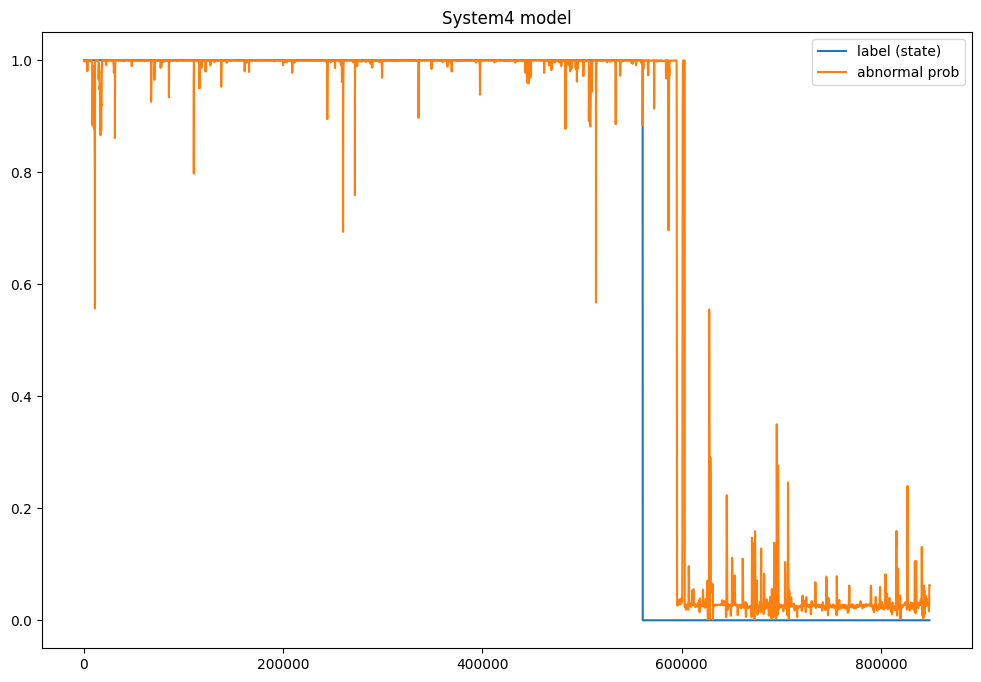

In [41]:
# 확률
System4_prob = System4_model.predict_proba(System4_test_x)

# 시각화
plt.figure(figsize=(12, 8))
plt.plot(System4_test_y, label='label (state)')
plt.plot(System4_prob[:,1], label='abnormal prob')
plt.legend()
plt.title('System4 model')
plt.show()

## Problem 2

In [42]:
engine_df = pd.DataFrame({'System1 prob': System1_prob[:,1],
                          'System2 prob': System2_prob[:,1],
                          'System3 prob': System3_prob[:,1],
                          'System4 prob': System4_prob[:,1],
                          'state': System4_test_y}) # test dataset의 label 가져옴 (모든 모델의 label동일하니 아무거나)
engine_df.head()

,System1 prob,System2 prob,System3 prob,System4 prob,state
0,0.855168,0.685391,0.999586,0.999636,1.0
1,0.855168,0.685391,0.999586,0.999635,1.0
2,0.855168,0.685391,0.999586,0.999635,1.0
3,0.855168,0.685391,0.999564,0.999616,1.0
4,0.855168,0.685391,0.999564,0.999616,1.0


### Train & Test

In [43]:
# trian & test 나누기
x = engine_df.drop('state', axis=1)
y = engine_df['state']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
print("train -", x_train.shape, y_train.shape)
print("test -", x_test.shape, y_test.shape)

train - (678981, 4) (678981,)
test - (169746, 4) (169746,)


### Logistic Regression

In [44]:
# 모델 선언 및 훈련
engine_model = LogisticRegression(solver="lbfgs", C=10, tol=1e-4, max_iter=1000)

# 훈련                               
engine_model.fit(x_train, y_train)

LogisticRegression(C=10, max_iter=1000)

In [45]:
# 예측값
engine_pred = engine_model.predict(x_test)

# 다른 평가지표
precision = precision_score(y_test, engine_pred)
recall = recall_score(y_test, engine_pred)
f1 = f1_score(y_test, engine_pred)
accuracy = engine_model.score(x_test, y_test)
print("Accuracy(정확도):", accuracy.round(2))
print('Presicion(정밀도): ', precision.round(2))
print('Recall(재현율): ', recall.round(2))
print('F1_score: ', f1.round(2))

Accuracy(정확도): 0.96
Presicion(정밀도):  0.94
Recall(재현율):  1.0
F1_score:  0.97


### SHAP

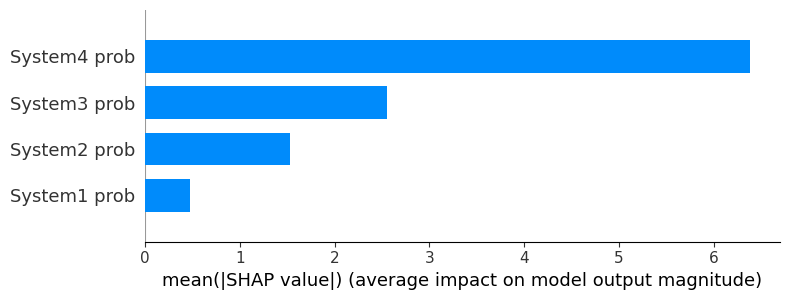

In [46]:
explainer = shap.Explainer(engine_model, x_train, feature_names=x_train.columns)
shap_values = explainer(x_test)
shap.summary_plot(shap_values, x_train, plot_type='bar')